In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pyeeg as pg
import scipy.io as sio
import matplotlib.pylab as plt
from sys import getsizeof

/Users/Anuar_The_Great/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
f = np.load('/Users/Anuar_The_Great/desktop/ML/train_1_npy/1_1_0.npy')
f1 = np.load('/Users/Anuar_The_Great/desktop/ML/train_1_npy/1_1_1.npy')

In [3]:
f.shape

(240000, 16)

In [22]:
f[0:5]

array([[  3.27575564,  24.06667709, -54.99739075,  -3.78955483,
        -19.48268318, -21.09876251,   6.14820957, -14.25691795,
        -17.06541061,  72.93850708, -18.98380661, -26.17956352,
         39.67823792,  22.50750732,  -8.21062088,  16.26460457],
       [  1.27575576,  20.06667709, -64.99739075,  -2.78955483,
        -22.48268318, -21.09876251,   7.14820957, -17.25691795,
        -14.06541061,  80.93850708, -21.98380661, -20.17956352,
         44.67823792,  24.50750732,  -2.21062064,  13.26460552],
       [  4.27575588,  16.06667709, -63.99739075,   3.21044517,
        -26.48268318, -20.09876251,   5.14820957, -17.25691795,
        -15.06541061,  78.93850708, -26.98380661, -22.17956352,
         46.67823792,  25.50750732,  -2.21062064,  15.26460552],
       [  5.27575588,  13.06667709, -58.99739075,   7.2104454 ,
        -28.48268318, -19.09876251,   8.14820957, -19.25691795,
        -14.06541061,  70.93850708, -26.98380661, -17.17956352,
         44.67823792,  18.50750732,  

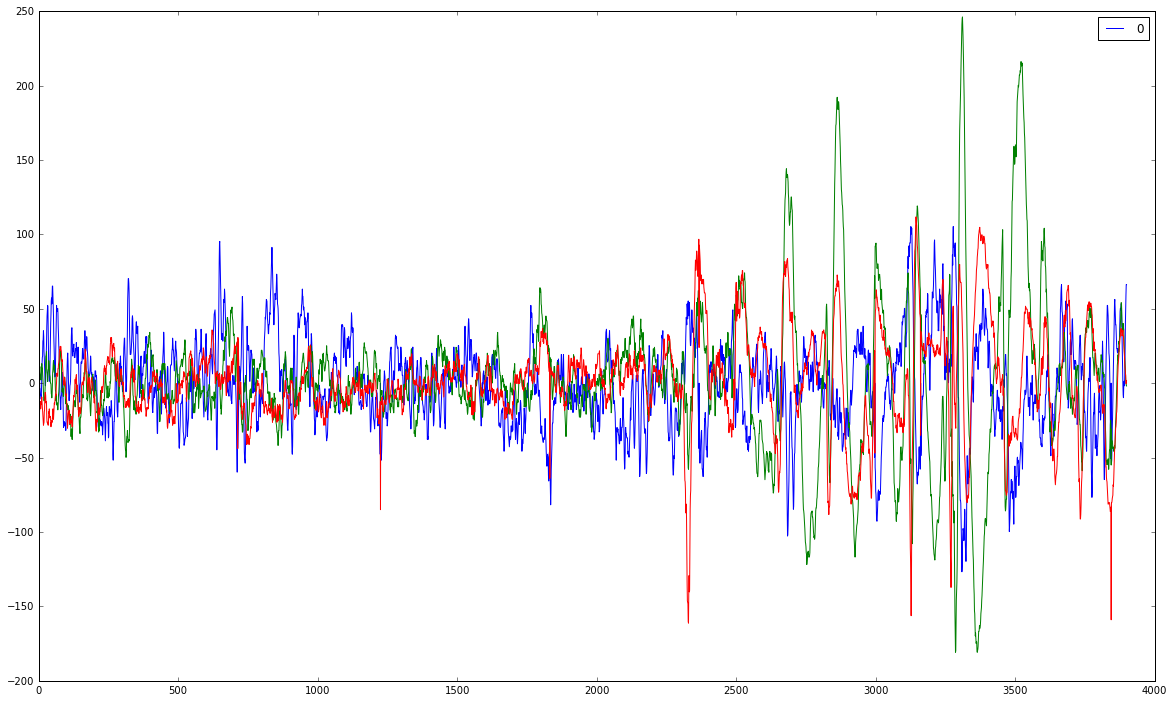

In [44]:
plt.figure(figsize=(20, 12))
plt.plot(f[0:3900,0], label='0')
plt.plot(f[0:3900,6])
plt.plot(f[0:3900,7])
plt.legend()

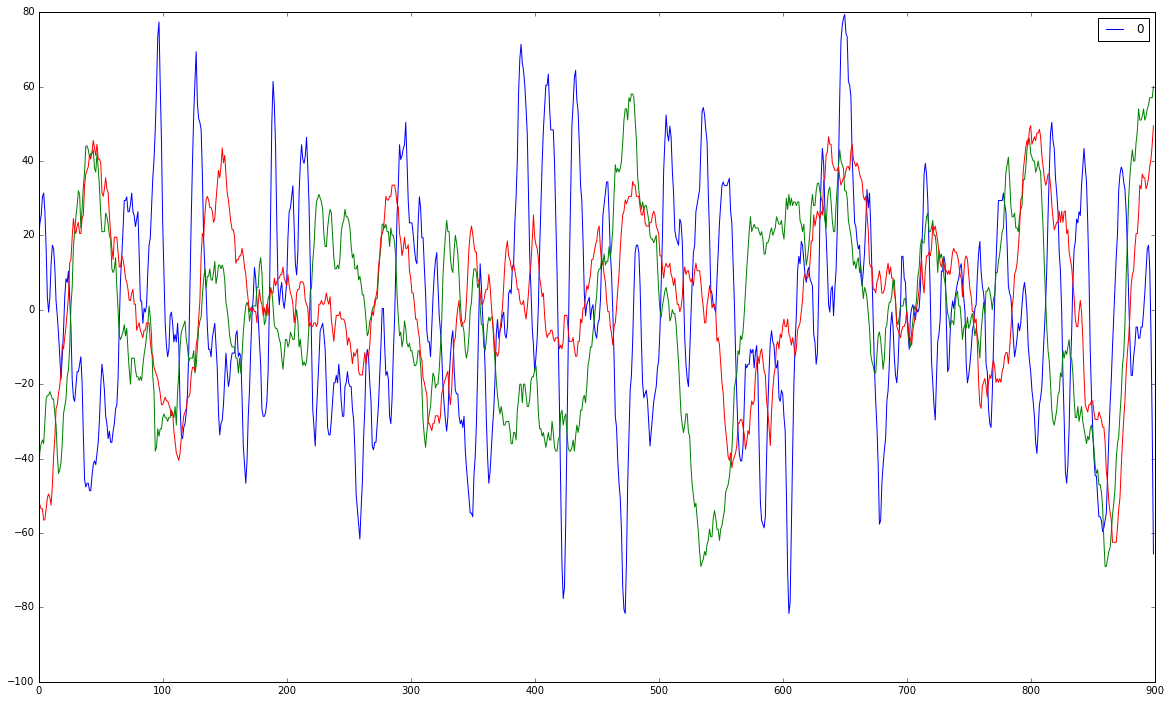

In [47]:
plt.figure(figsize=(20, 12))
plt.plot(f1[0:900,0], label='0')
plt.plot(f1[0:900,6])
plt.plot(f1[0:900,7])
plt.legend()

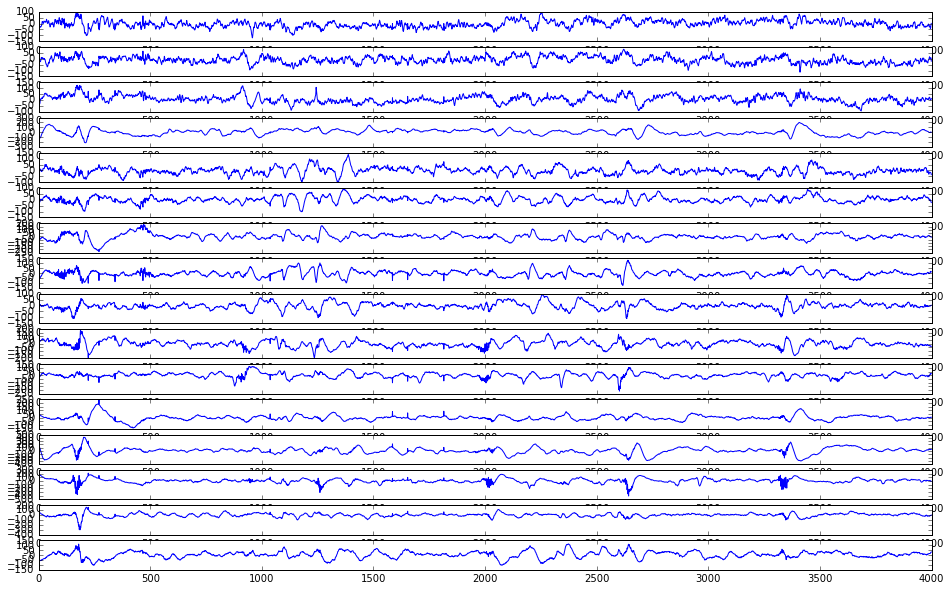

In [53]:
fig, axs = plt.subplots(16, 1, figsize=(16, 10))
for i in range(16):
    axs[i].plot(f[200000:204000, i])

Each file contains 240,000 x 16 points. Which is 10 hours of recording.

From the graph:
Some channels have consistently higher amplitude, perhaps need to normalize.
Some are correlated, others do not seem to be (however, they can be but with a significant lag).

2 types of electrodes:

1) The ones in pairs. "Localizing normal or abnormal brain waves in bipolar montages is usually accomplished by identifying "phase reversal," a deflection of the two channels within a chain pointing to opposite directions. "

2) The one attached to a reference electrode. "In general, the electrode with the largest upward deflection represents the maximum negative activity in a referential montage."

"Any part of any 10-minute data segment can potentially contain “data drop-out” where the intracranial brain implant has temporarily failed to record data. This data drop-out corresponds to iEEG signal values of zeros across all channels at a given time sample. "
"The data may also contain artifacts such as large amplitude rapid signal transitions that can be removed from analysis."


![picture](desktop/ML/EEG.png)
![picture](desktop/ML/types_waves.png)
![picture](desktop/ML/BETS.png)


Apparently, the EEG rhythms span across all channels, so we should try to exclude the time spans when Theta and Delta types prevail. (high frequency filter)

Typical settings for the high-pass filter and a low-pass filter are 0.5-1 Hz and 35–70 Hz, respectively. The high-pass filter typically filters out slow artifact, such as electrogalvanic signals and movement artifact, whereas the low-pass filter filters out high-frequency artifacts, such as electromyographic signals. An additional notch filter is typically used to remove artifact caused by electrical power lines (60 Hz in the United States and 50 Hz in many other countries).[1]

A typical adult human EEG signal is about 10 µV to 100 µV in amplitude.

Generalized epileptiform discharges often have an anterior maximum, but these are seen synchronously throughout the entire brain. They are strongly suggestive of a generalized epilepsy.


In [11]:
f_split = np.split(f, 10)

In [15]:
f_split[0].shape

(24000, 16)

In [21]:
from scipy.signal import butter, lfilter


def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y
f = np.load('/Users/Anuar_The_Great/desktop/ML/train_1_npy/1_24_0.npy')
f1 = f.T
filtered = filter_freq(f1, 400, 600, 0.1, 180.0)
print "======"*10
print butter_bandpass_filter(f1, 0.1, 180.0, 400)
print "======"*10
print f1
print "======"*10

new_x = compute_fft(filtered, data_length_sec, sampling_frequency, nfreq_bands, win_length_sec, stride_sec, features)
#print new_x
print "======"*10
print new_x.shape
#print new_x[0,]
print np.nonzero(new_x > 180)
print np.nonzero(new_x < -1)

[[ -1.89411464e+01  -3.38914980e+01  -1.73625481e+01 ...,   4.86313229e-05
    4.87095951e-05   4.87876639e-05]
 [ -1.48930476e+01  -3.35321103e+01  -3.34344579e+01 ...,   2.06539806e-04
    2.06164369e-04   2.05788770e-04]
 [  1.34146298e+01   2.99614295e+01   2.69934019e+01 ...,  -1.86646161e-04
   -1.86505811e-04  -1.86365117e-04]
 ..., 
 [ -2.36614646e+01  -5.71445233e+01  -5.99828308e+01 ...,  -6.34968020e-05
   -6.34712881e-05  -6.34456354e-05]
 [ -2.78068083e+01  -5.59042360e+01  -4.04495343e+01 ...,  -4.15181861e-05
   -4.15123623e-05  -4.15064369e-05]
 [  3.42747374e+01   7.42932387e+01   6.58902819e+01 ...,   3.60024148e-05
    3.58053953e-05   3.56084782e-05]]
[[-31.65331841 -24.65331841 -19.65331841 ...,   0.           0.           0.        ]
 [-24.88837624 -30.88837624 -36.88837814 ...,   0.           0.           0.        ]
 [ 22.41773224  27.41773224  28.41773224 ...,   0.           0.           0.        ]
 ..., 
 [-39.54163361 -55.54163361 -63.54163361 ...,   0.     

In [25]:
f = np.load('/Users/Anuar_The_Great/desktop/ML/train_1_npy/1_24_0.npy')
f1 = f.T
filtered = np.zeros((f1.shape[0], f1.shape[1]))
for i in range(16):
    filtered[i,] = filter_freq(f1[i,].reshape(1, 240000), 400, 600, 0.1, 180.0)
print(filtered.shape)
data_length_sec = 600
sampling_frequency = 400
nfreq_bands = 6    # can play around with these:
win_length_sec = 60
stride_sec = 60
features = "meanlog_std"

new_x = compute_fft(filtered, data_length_sec, sampling_frequency, nfreq_bands, win_length_sec, stride_sec, features)
print new_x.shape
#print new_x[0,]
print np.nonzero(new_x > 180)
np.nonzero(new_x < -100000)

(16, 240000)
(16, 7, 10)
(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))


(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

# Everything after here:

In [38]:
import numpy as np
from functools import partial
#from multiprocessing import Pool
from pandas import DataFrame
import scipy as sc
import scipy.signal
import os



def group_into_bands(fft, fft_freq, nfreq_bands):
    if nfreq_bands == 178:
        bands = range(1, 180)
    elif nfreq_bands == 4:
        bands = [0.1, 4, 8, 12, 30]
    elif nfreq_bands == 6:
        bands = [0.1, 4, 8, 12, 30, 70, 180]
    # http://onlinelibrary.wiley.com/doi/10.1111/j.1528-1167.2011.03138.x/pdf
    elif nfreq_bands == 8:
        bands = [0.1, 4, 8, 12, 30, 50, 70, 100, 180]
    elif nfreq_bands == 12:
        bands = [0.1, 4, 8, 12, 30, 40, 50, 60, 70, 85, 100, 140, 180]
    elif nfreq_bands == 9:
        bands = [0.1, 4, 8, 12, 21, 30, 50, 70, 100, 180]
    else:
        raise ValueError('wrong number of frequency bands')
    freq_bands = np.digitize(fft_freq, bands)
    df = DataFrame({'fft': fft, 'band': freq_bands})
    df = df.groupby('band').mean()
    return df.fft[1:-1]

# returns channels x bins x time-frames
def compute_fft(x, data_length_sec, sampling_frequency, nfreq_bands, win_length_sec, stride_sec, features):
    n_channels = x.shape[0]
    n_timesteps = (data_length_sec - win_length_sec) / stride_sec + 1
    n_fbins = nfreq_bands + 1 if 'std' in features else nfreq_bands

    x2 = np.zeros((n_channels, n_fbins, n_timesteps))
    for i in range(n_channels):
        xc = np.zeros((n_fbins, n_timesteps))
        for frame_num, w in enumerate(range(0, data_length_sec - win_length_sec + 1, stride_sec)):
            #print frame_num, w
            xw = x[i, w * sampling_frequency: (w + win_length_sec) * sampling_frequency]
            fft = np.log10(np.absolute(np.fft.rfft(xw)))
            fft_freq = np.fft.rfftfreq(n=xw.shape[-1], d=1.0 / sampling_frequency)
            xc[:nfreq_bands, frame_num] = group_into_bands(fft, fft_freq, nfreq_bands)
            if 'std' in features:
                xc[-1, frame_num] = np.std(xw)
        x2[i, :, :] = xc
    return x2

# filters out the low freq and high freq 
def filter_freq(x, new_sampling_frequency, data_length_sec, lowcut, highcut):
    x1 = scipy.signal.resample(x, new_sampling_frequency * data_length_sec, axis=1)

    nyq = 0.5 * new_sampling_frequency
    b, a = sc.signal.butter(5, np.array([lowcut, highcut]) / nyq, btype='band')
    x_filt = sc.signal.lfilter(b, a, x1, axis=1)
    return np.float32(x_filt)

f = np.load('/Users/Anuar_The_Great/desktop/ML/train_1_npy/1_1_0.npy')
# compute_fft accepts a matrix of channels x time, so we gotta transpose
x = f.T  
data_length_sec = 600
sampling_frequency = 400
nfreq_bands = 6    # can play around with these:
win_length_sec = 60 
stride_sec = 60
features = "meanlog_std"  # will create a new additional bin of standard deviation of other bins


# Test one observation
new_x = compute_fft(x, data_length_sec, sampling_frequency, nfreq_bands, win_length_sec, stride_sec, features)
print(new_x.shape)
#print new_x


# Computes X and y from all the .npy files in a directory
# X = n x channels x filters x time-frames
# y = n x 1
def compute_X_Y(direc):
    n = len([name for name in os.listdir(direc)])
    X = np.zeros((n, 16, 7, 10))
    y = np.empty((n, 1))
    for i, filename in enumerate(os.listdir(direc)):
        if filename.endswith('.npy'):
            f = np.load(direc + filename)
            f = f.T
            filtered = filter_freq(f, 400, 600, 0.1, 180.0)
            new_x = compute_fft(filtered, data_length_sec, sampling_frequency, nfreq_bands, win_length_sec, stride_sec, features)
            X[i, ] = new_x
            if filename.endswith('1.npy'):
                y[i] = 1
            elif filename.endswith('0.npy'):
                y[i] = 0
            continue
        else:
            continue
    
    return X, y

direc_train = '/Users/Anuar_The_Great/desktop/ML/train_1_npy_train/'
direc_test = '/Users/Anuar_The_Great/desktop/ML/train_1_npy_test/'
X_train, y_train1 = compute_X_Y(direc_train)
X_test, y_test1 = compute_X_Y(direc_test)

(16, 7, 10)


In [66]:
# Reshaping the (bins x channels)
X_train1 = X_train.reshape((X_train.shape[0], 10, 112))
X_test1 = X_test.reshape((X_test.shape[0], 10, 112))

In [44]:
# making the binary output value into a vector [0, 1] or [1, 0]
ys = np.zeros((y_train1.shape[0], 2))
ys[:, 1] = (y_train1 > 0).reshape(y_train1.shape[0],)
ys[:, 0] = (y_train1 < 1).reshape(y_train1.shape[0],)
y_train = ys

yt = np.zeros((y_test1.shape[0], 2))
yt[:, 1] = (y_test1 > 0).reshape(y_test1.shape[0],)
yt[:, 0] = (y_test1 < 1).reshape(y_test1.shape[0],)
y_test = yt
#print(y_test)
#print(y_train)

In [77]:
X_train = np.abs(X_train1)
X_test = np.abs(X_test1)

In [78]:
# You can check whether there are some negative or large frequencies
print(np.nonzero(X_train < 0))

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))


In [79]:
from __future__ import print_function
import numpy as np
#np.random.seed(1337)  # for reproducibility

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Reshape
from keras.layers import Embedding
from keras.layers import Convolution1D#, GlobalMaxPooling1D
from keras import backend as K


# set parameters:
#max_features = 5000
#maxlen = 400
batch_size = 32
embedding_dims = 50
nb_filter = 16
filter_length = 1
hidden_dims = 112
nb_epoch = 50
n = X_train.shape[0]

print('Loading data...')
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

# print('Pad sequences (samples x time)')
# X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
# X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

print('Build model...')
model = Sequential()

# we add a Convolution1D, which will learn nb_filter
# word group filters of size filter_length:
model.add(Convolution1D(nb_filter=nb_filter,
                        filter_length=filter_length,
                        border_mode='valid',
                        activation='sigmoid',
                        #subsample_length=1,
                        input_shape=(10, 112)))
                        #input_dim=112))

model.add(Reshape((nb_filter*10,)))
# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Activation('sigmoid'))
#model.add(Dropout(0.2))
#model.add(Dense(hidden_dims))
#model.add(Activation('sigmoid'))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.summary()

print("Compiling model...")
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print("Fitting Model...")
model.fit(X_train, y_train,
          batch_size=batch_size,
          nb_epoch=nb_epoch,
          verbose=2,
          validation_data=(X_test, y_test))

Loading data...
301 train sequences
81 test sequences
X_train shape: (301, 10, 112)
X_test shape: (81, 10, 112)
Build model...
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution1d_17 (Convolution1D) (None, 10, 16)        1808        convolution1d_input_17[0][0]     
____________________________________________________________________________________________________
reshape_17 (Reshape)             (None, 160)           0           convolution1d_17[0][0]           
____________________________________________________________________________________________________
dense_35 (Dense)                 (None, 112)           18032       reshape_17[0][0]                 
____________________________________________________________________________________________________
activation_35 (Activation)       (None, 112)           0         